In [0]:
# default_exp data.exploratory.se.metrics

# Exploration of your data

> This module comprises some of the statistical and inference techniques to describe the inner properties of software data. The submodules might include:
>
> - Descriptive statistics
> - Software Metrics
> - Information Theory
> - Learning Principels Detection (Occams' Razor, Biased data, and Data Snooping)
> - Inference: Probabilistic and Causal

### Specifically in this module

> - Cyclomatic complexity (CYCLO)
> - Coupling Between Objects (CBO)
> - Lack of Cohesion of Methods 5 (LCOM5)
> - Top/Least 20 Occurring Tokens
> - Percentage of redundancy (just Java)
> - How many Type I and Type II clones are in Java datasets?

In [0]:
# #hide
# from nbdev.showdoc import *

In [3]:
!pip install sentencepiece
# !pip install metrics # Outdated Cyclomatic Complexity tool
!pip install lizard
!pip install tree_sitter

In [0]:
# export
# Imports
import pandas as pd
import sentencepiece as sp
from numpy import mean, std
from statistics import median
from scipy.stats import sem, t
import lizard
import matplotlib.pyplot as plt
from tree_sitter import Language, Parser

# TODO: Remove when mongo call is implemented
import os

In [5]:
!git clone https://github.com/tree-sitter/tree-sitter-c
# !git clone https://github.com/tree-sitter/tree-sitter-cpp
!git clone https://github.com/tree-sitter/tree-sitter-java
# !git clone https://github.com/tree-sitter/tree-sitter-javascript
# !git clone https://github.com/tree-sitter/tree-sitter-python

fatal: destination path 'tree-sitter-c' already exists and is not an empty directory.
fatal: destination path 'tree-sitter-java' already exists and is not an empty directory.


In [0]:
# TODO: Replace with actual mongo call
def simulate_getting_dataframes_from_mongo():
    corpus_data = {"system": [], "name": [], "ground_truth": [], "contents": []}
    path = "./source_code"
    for file in os.listdir(path):
        corpus_data["system"].append(None)
        corpus_data["name"].append(file)
        corpus_data["ground_truth"].append("src")
        try:
            with open (os.path.join(path, file), "r", encoding='utf-8') as f:
                corpus_data['contents'].append(f.read())
        except UnicodeDecodeError:
            with open (os.path.join(path, file), "r", encoding='iso-8859-15') as f:
                corpus_data['contents'].append(f.read())
    corpus_df = pd.DataFrame(data = corpus_data)
    return corpus_df

In [0]:
# export
def add_length_col(df, col, length_col_name='length'):
    """Adds a length column with the length of entries in the specified column of a dataframe"""
    df[length_col_name] = df[col].astype(str).apply(len)
    return df

In [0]:
# export
def add_mccabe_metrics(df, col):
    """Adds information about function length and cyclomatic complexity to the corpus dataframe"""
    file_ccn = []
    file_nloc = []
    num_funcs = []
    avg_func_ccn = []
    avg_func_nloc = []
    # avg_func_tok_count = [] # TODO: Figure out how lizard tokenizes
    for i in range(len(df)):
        metrics = lizard.analyze_file.analyze_source_code(df["name"][i], df["contents"][i])
        file_ccn.append(metrics.CCN)
        file_nloc.append(metrics.nloc)
        num_funcs.append(len(metrics.function_list))
        avg_func_ccn.append(metrics.average_cyclomatic_complexity)
        avg_func_nloc.append(metrics.average_nloc)
        # avg_func_tok_count.append(metrics.average_token_count) # TODO: Figure out how lizard tokenizes
    df["file_ccn"] = file_ccn
    df["file_nloc"] = file_nloc
    df["num_funcs"] = num_funcs
    df["avg_func_ccn"] = avg_func_ccn
    df["avg_func_nloc"] = avg_func_nloc
    # df["avg_func_tok_count"] = avg_func_tok_count # TODO: Figure out how lizard tokenizes
    return df

In [0]:
#export
def create_parser_builds(path=None):
    """Creates a dictionary of tree-sitter parsers for select languages"""
    Language.build_library(
        # Store the library in the `build` directory
        'build/my-languages.so',

        # Include one or more languages
        [
            'tree-sitter-c',
            # 'tree-sitter-cpp',
            'tree-sitter-java',
            # 'tree-sitter-javascript',
            # 'tree-sitter-python'
        ]
    )

    C_LANGUAGE = Language('build/my-languages.so', 'c')
    # CPP_LANGUAGE = Language('build/my-languages.so', 'cpp')
    JAVA_LANGUAGE = Language('build/my-languages.so', 'java')
    # JS_LANGUAGE = Language('build/my-languages.so', 'javascript')
    # PY_LANGUAGE = Language('build/my-languages.so', 'python')
    
    return {'c':C_LANGUAGE, 'java':JAVA_LANGUAGE}

In [0]:
#export
def class_attributes_c(tree, text):
    return 0

In [0]:
#export
def num_methods_c(tree):
    return 0

In [0]:
#export
def distinct_class_attribute_calls_c(tree, atts, file_text):
    return 0

In [0]:
#export
def find_class_nodes(node, class_nodes):
    for i in range(len(node.children)):
        if node.children.type == "class_declaration":
            class_nodes.append(node)


    if node.type == "class_declaration":
        class_nodes.append(node)
        return class_nodes
    if len(node.children) == 0:
        return class_nodes
    for i in range(len(node.children)):
        class_nodes = 

In [0]:
#export
def class_attributes_java(tree, text):
    """Finds the fields/attributes of each class in a sample of java code"""
    root_node = tree.root_node
    class_atts = []
    for a in range(len(root_node.children)):
        if root_node.children[a].type == "class_declaration":
            atts = []
            class_dec = root_node.children[a]
            for b in range(len(class_dec.children)):
                if class_dec.children[b].type == "class_body":
                    class_body = class_dec.children[b]
                    for c in range(len(class_body.children)):
                        if class_body.children[c].type == "field_declaration":
                            field_dec = class_body.children[c]
                            for d in range(len(field_dec.children)):
                                if field_dec.children[d].type == "variable_declarator":
                                    var_dec = field_dec.children[d]
                                    for e in range(len(var_dec.children)):
                                        if var_dec.children[e].type == "name":
                                            word = ""
                                            for i in range(var_dec.children[e].start_byte, var_dec.children[e].end_byte):
                                                word += text[i]
                                            atts.append(word)
            class_atts.append(atts)
    return class_atts

In [0]:
#export
def num_methods_java(tree):
    """Counts the number of methods for each class in a sample of java code"""
    root_node = tree.root_node
    class_methods = []
    for a in range(len(root_node.children)):
        if root_node.children[a].type == "class_declaration":
            num_methods = 0
            class_dec = root_node.children[a]
            for b in range(len(class_dec.children)):
                if class_dec.children[b].type == "class_body":
                    class_body = class_dec.children[b]
                    for c in range(len(class_body.children)):
                        if class_body.children[c].type == "method_declaration":
                            num_methods += 1
            class_methods.append(num_methods)
    return class_methods

In [0]:
#export
def find_string_in_file(node, pattern, text):
    """Counts the number of occurences of a pattern in a sample of code"""
    if len(node.children) > 0:
        count = 0
        for i in node.children:
            count += find_string_in_file(i, pattern, text)
        return count
    else:
        word = ""
        for i in range(node.start_byte, node.end_byte):
            try:
                word += text[i]
            except IndexError:
                print(f"pattern was: {pattern}")
                print(f"i was: {i}")
                print(f"start_byte was: {node.start_byte}")
                print(f"end_byte was: {node.end_byte}")
                print(text)
                raise indexError
        if word == pattern:
            # print(f"Found. Start byte: {node.start_point}, end byte: {node.end_point}")
            return 1
        else:
            return 0

In [0]:
#export
def distinct_class_attribute_calls_java(tree, atts, file_text):
    """Counts the sum of distinct attribute calls per method per class in code"""
    class_index = -1
    class_totals_list = []
    root_node = tree.root_node
    for a in range(len(root_node.children)):
        if root_node.children[a].type == "class_declaration":
            class_index += 1
            class_distinct_att_calls = 0
            class_dec = root_node.children[a]
            for b in range(len(class_dec.children)):
                if class_dec.children[b].type == "class_body":
                    class_body = class_dec.children[b]
                    for c in range(len(class_body.children)):
                        if class_body.children[c].type == "method_declaration":
                            distinct_attribute_calls = 0
                            for attribute in atts[class_index]:
                                if find_string_in_file(class_body.children[c], attribute, file_text):
                                    distinct_attribute_calls += 1
                            class_distinct_att_calls += distinct_attribute_calls
            class_totals_list.append(class_distinct_att_calls)
    return class_totals_list

In [0]:
#export
def get_lcom5(tree, extension, file_text):
    """Parses the syntax tree of code to calculate the LCOM5 of its classes"""
    num_atts_func_dict = {'c':class_attributes_c, 'java':class_attributes_java}
    num_methods_func_dict = {'c':num_methods_c, 'java':num_methods_java}
    num_att_calls_func_dict = {'c':distinct_class_attribute_calls_c, 'java':distinct_class_attribute_calls_java}
    if extension not in num_atts_func_dict:
        print(f"Tried to get LCOM5 of file with extension '.{extension}', that language is not supported, 0 assigned to column.")
        return [0]
    cursor = tree.walk()
    atts = num_atts_func_dict[extension](tree, file_text)
    print(atts)
    meths = num_methods_func_dict[extension](tree)
    dist_att_calls = num_att_calls_func_dict[extension](tree, atts, file_text)
    if len(atts) != len(meths) or len(meths) != len(dist_att_calls):
        print(f"Parser error, inconsistent number of classes found. Returning '0'")
        return [0]
    lcom5_list = []
    for i in range(len(atts)):
        if (len(atts[i]) - (meths[i]*len(atts[i]))) == 0:
            lcom5_list.append(0)
        else:
            lcom5_list.append((dist_att_calls[i] - (meths[i]*len(atts[i])))/(len(atts[i]) - (meths[i]*len(atts[i]))))
    return lcom5_list
        

In [0]:
#export
def add_lcom5(df, col):
    """Adds a column with the LCOM5 of each class of each file to a dataframe"""
    lang_builds = create_parser_builds()
    parser = Parser()
    file_lcom5 = []
    for i in range(len(df)):
        ext = df["name"][i].split('.')[-1]
        parser.set_language(lang_builds[ext])
        tree = parser.parse(bytes(df["contents"][i], "utf8"))
        file_lcom5.append(get_lcom5(tree, ext, df["contents"][i]))
    df["file_lcom5"] = file_lcom5
    return df

In [0]:
#export
def flatten_list_of_lists(list_list):
    """Takes in a list of lists and flattens it, returning a list of each entry"""
    flattened_list = []
    for sublist in list_list:
        for entry in sublist:
            flattened_list.append(entry)
    return flattened_list

In [0]:
# export
def display_numeric_col_stats(col, conf = 0.95, sig_figs = 4):
    """Computes statistical metrics about the entries in a dataframe column or list"""
    print("Min =", round(min(col), sig_figs))
    print("Max =", round(max(col), sig_figs))
    print("Average =", round(mean(col), sig_figs))
    print("Median =", round(median(col), sig_figs))
    print("Standard Deviation =", round(std(col), sig_figs))
    
    n = len(col)
    m = mean(col)
    std_err = sem(col)
    h = std_err * t.ppf((1 + conf) / 2, n - 1)

    start = m - h
    end = m + h
    print(f"{conf} of data points fall between {round(start, sig_figs)} and {round(end, sig_figs)}")

In [0]:
#export
def display_numeric_col_hist(col, col_name="measure", num_bins=None):
    """Displays a histogram with a customized number of bins for the data in a specified dataframe column or list"""
    rng = max(col) - min(col)
    num = len(col)
    stnd_dev = std(col)
    # num_bins = round((rng*(pow(num,1/3)))/(3.49*stnd_dev)) # Bins calculated according to https://academic.oup.com/biomet/article-abstract/66/3/605/232642
    if not num_bins:
        num_bins = 20
    plt.hist(col, num_bins, color="blue", alpha=0.5, edgecolor="black", linewidth=1.0)
    plt.title(col_name + " Histogram")
    plt.ylabel("Value Occurrences")
    plt.xlabel(col_name)
    plt.show()

# Analysis & Visualization

In [22]:
# Retrieve the data
corpus_df = simulate_getting_dataframes_from_mongo()
total_file_count = len(corpus_df)
print("Total files:", total_file_count)

Total files: 215


In [45]:
# Add the new metric columns to the corpus dataframe
corpus_df = add_length_col(corpus_df, 'contents', 'code_length')
corpus_df = add_mccabe_metrics(corpus_df, 'contents')
corpus_df = add_lcom5(corpus_df, 'contents')

[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]

Min = 221
Max = 38252
Average = 5051.1814
Median = 3596
Standard Deviation = 5257.0954
0.95 of data points fall between 4342.8278 and 5759.535


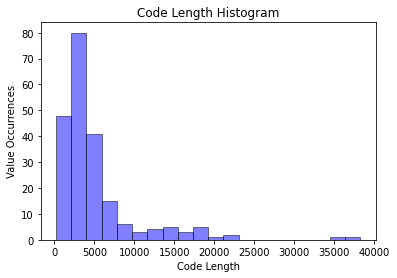

In [24]:
# Print statistical information about the length of each file
display_numeric_col_stats(corpus_df['code_length'])
display_numeric_col_hist(corpus_df['code_length'], "Code Length")

Min = 2
Max = 98
Average = 20.1091
Median = 10
Standard Deviation = 20.2598
0.95 of data points fall between 14.5816 and 25.6366


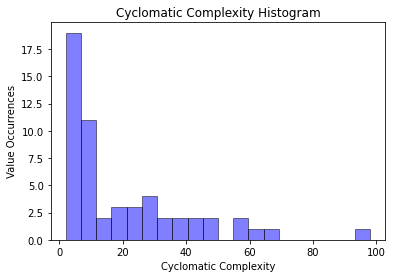

In [74]:
# Print statistical information about the cyclomatic complexity per file
display_numeric_col_stats(corpus_df['file_ccn'])
display_numeric_col_hist(corpus_df['file_ccn'], "Cyclomatic Complexity")

Min = 33
Max = 781
Average = 190.2545
Median = 127
Standard Deviation = 149.8379
0.95 of data points fall between 149.3743 and 231.1347


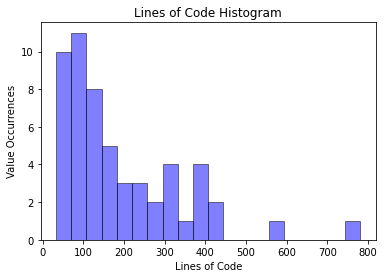

In [73]:
# Print statistical information about the number of lines of code per file
display_numeric_col_stats(corpus_df['file_nloc'])
display_numeric_col_hist(corpus_df['file_nloc'], "Lines of Code")

Min = 2
Max = 22
Average = 6.4727
Median = 5
Standard Deviation = 3.8934
0.95 of data points fall between 5.4105 and 7.535


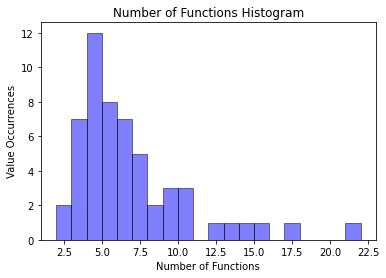

In [72]:
# Print statistical information about the number of functions per file
display_numeric_col_stats(corpus_df['num_funcs'])
display_numeric_col_hist(corpus_df['num_funcs'], "Number of Functions")

Min = 1.0
Max = 6.5333
Average = 2.6903
Median = 2.0
Standard Deviation = 1.5997
0.95 of data points fall between 2.2538 and 3.1267


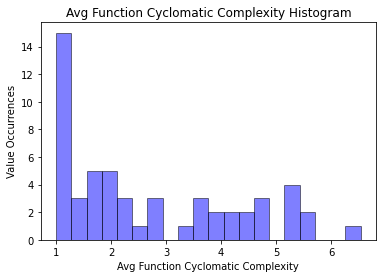

In [71]:
# Print statistical information about the average function cyclomatic complexities per file
display_numeric_col_stats(corpus_df['avg_func_ccn'])
display_numeric_col_hist(corpus_df['avg_func_ccn'], "Avg Function Cyclomatic Complexity")

Min = 10.0
Max = 59.4
Average = 24.8381
Median = 21.0588
Standard Deviation = 12.2453
0.95 of data points fall between 21.4972 and 28.1789


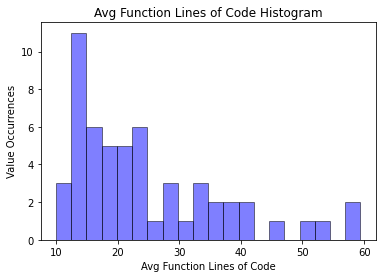

In [70]:
# Print statistical information about the average function cyclomatic complexity per file
display_numeric_col_stats(corpus_df['avg_func_nloc'])
display_numeric_col_hist(corpus_df['avg_func_nloc'], "Avg Function Lines of Code")

Min = 0
Max = 2.0
Average = 0.8056
Median = 0.9167
Standard Deviation = 0.3975
0.95 of data points fall between 0.7021 and 0.9092


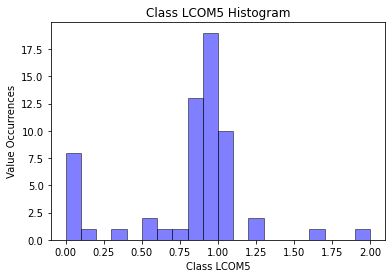

In [69]:
# # Print statistical information about the average LCOM5 per file
display_numeric_col_stats(flatten_list_of_lists(corpus_df['file_lcom5']))
display_numeric_col_hist(flatten_list_of_lists(corpus_df['file_lcom5']), "Class LCOM5")

In [0]:
pd.set_option('display.expand_frame_repr', False)
corpus_df.head(20)

In [0]:
# pd.set_option('display.expand_frame_repr', False)
# corpus_df

In [0]:
# https://github.com/priv-kweihmann/multimetric
# The above link is another possible tool to easily calculate code metrics for various languages

In [0]:
# https://books.google.com/books?id=DxuGi5h2-HEC&pg=PA140&lpg=PA140&dq=do+header+files+in+c+have+a+cyclomatic+complexity&source=bl&ots=0WxxjeX9rR&sig=ACfU3U1QnoKnwrsj4YbSQxATeaoYMvBWwg&hl=en&sa=X&ved=2ahUKEwijtqKxhJXoAhUSXa0KHctQD38Q6AEwAnoECAkQAQ#v=onepage&q=do%20header%20files%20in%20c%20have%20a%20cyclomatic%20complexity&f=false
# The abover link goes to an article discussing cyclomatic complexity and c header files

In [0]:
# http://site.iugaza.edu.ps/mroos/files/Software-Metrics1.pdf
# The above link is a pdf that explains every LCOM metric

In [0]:
# https://hal.inria.fr/hal-00646878/file/Duca11b-Cutter-deliverable11-SoftwareMetrics.pdf
# Another good article about the cohesion metrics among others

# Scratch Code (Testing)

In [0]:
Language.build_library(
    # Store the library in the `build` directory
    'build/my-languages.so',

    # Include one or more languages
    [
        'tree-sitter-c',
        'tree-sitter-cpp',
        'tree-sitter-java',
        'tree-sitter-javascript',
        'tree-sitter-python'
    ]
)

C_LANGUAGE = Language('build/my-languages.so', 'c')
CPP_LANGUAGE = Language('build/my-languages.so', 'cpp')
JAVA_LANGUAGE = Language('build/my-languages.so', 'java')
JS_LANGUAGE = Language('build/my-languages.so', 'javascript')
PY_LANGUAGE = Language('build/my-languages.so', 'python')

lang_builds = {'c':C_LANGUAGE, 'cpp':CPP_LANGUAGE, 'java':JAVA_LANGUAGE, 'js':JS_LANGUAGE, 'py':PY_LANGUAGE}

parser = Parser()
ext = 'java'
parser.set_language(lang_builds[ext])
test_df = simulate_getting_dataframes_from_mongo()
tree = parser.parse(bytes(test_df["contents"][0], "utf8"))
# root_node = tree.root_node
# num_atts = 0
# for a in range(len(root_node.children)):
#     if root_node.children[a].type == "class_declaration":
#         class_dec = root_node.children[a]
#         for b in range(len(class_dec.children)):
#             if class_dec.children[b].type == "class_body":
#                 class_body = class_dec.children[b]
#                 for c in range(len(class_body.children)):
#                     if class_body.children[c].type == "field_declaration":
#                         field_dec = class_body.children[c]
#                         for d in range(len(field_dec.children)):
#                             if field_dec.children[d].type == "variable_declarator":
#                                 num_atts += 1
# print(num_atts)

In [50]:
root_node = tree.root_node
text = test_df["contents"][0]
for a in range(len(root_node.children)):
    if root_node.children[a].type == "class_declaration":
        class_dec = root_node.children[a]
        for b in range(len(class_dec.children)):
            if class_dec.children[b].type == "class_body":
                class_body = class_dec.children[b]
                for c in range(len(class_body.children)):
                    if class_body.children[c].type == "field_declaration":
                        field_dec = class_body.children[c]
                        for d in range(len(field_dec.children)):
                            if field_dec.children[d].type == "variable_declarator":
                                # word = ""
                                # for i in range(var_dec.children[e].start_byte, var_dec.children[d].end_byte):
                                #     word += text[i]
                                # print(word)
                                var_dec = field_dec.children[d]
                                for e in range(len(var_dec.children)):
                                    if var_dec.children[e].type == "identifier":
                                        word = ""
                                        for i in range(var_dec.children[e].start_byte, var_dec.children[e].end_byte):
                                            word += text[i]
                                        print(word)
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print("NOW PRINTING TEXT")
print(text)

erialVersionUID 
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
NOW PRINTING TEXT
package smos.application.teachingManagement;

import smos.Environment;
import smos.bean.Teaching;
import smos.bean.User;
import smos.exception.DuplicatedEntityException;
import smos.exception.EntityNotFoundException;
import smos.exception.InvalidValueException;
import smos.exception.MandatoryFieldException;
import smos.storage.ManagerTeaching;
import smos.storage.ManagerUser;
import smos.storage.connectionManagement.exception.ConnectionException;
import java.io.IOException;
import java.sql.SQLException;
import javax.servlet.http.HttpServlet;
import javax.servlet.http.HttpServletRequest;
import javax.servlet.http.HttpServletResponse;
import javax.servlet.http.HttpSession;

/**
 * Servlet utilizzata per modificare un insegnamento.
 * 
 * @author Giulio D'Amor

In [0]:
print(method.start_point)
print(method.end_point)
print(method.start_byte)
print(method.end_byte)
# print(test_df["contents"][1][558])
# print(test_df["contents"][1])
lines = test_df["contents"][1].split("\n")
print(lines[33])


(22, 4)
(35, 5)
558
975
    	testo[9].setText(DateUtils.parseDate(DateUtils.giveStringOfDate(p.getDataPren())));	    


In [0]:

def find_string_in_file(node, pattern, text):
    if len(node.children) > 0:
        count = 0
        for i in node.children:
            count += find_string_in_file(i, pattern, text)
        return count
    else:
        word = ""
        for i in range(node.start_byte, node.end_byte):
            # print(text[i], end="")
            word += text[i]
        # print()
        if word == pattern:
            print(f"Found. Start byte: {node.start_point}, end byte: {node.end_point}")
            return 1
        else:
            return 0
node = tree.root_node
num_found = find_string_in_file(node, "p", test_df["contents"][1])
print(num_found)

Found. Start byte: (10, 14), end byte: (10, 15)
Found. Start byte: (17, 8), end byte: (17, 9)
Found. Start byte: (26, 19), end byte: (26, 20)
Found. Start byte: (33, 69), end byte: (33, 70)
4


In [0]:
query = JAVA_LANGUAGE.query("""
(binary_expression
    left: ("etichetta")
""")

captures = query.captures(tree.root_node)

SyntaxError: ignored

In [0]:
assert len(captures) == 2
assert captures[0][0] == function_name_node
assert captures[0][1] == "function.def"

In [0]:
cursor = tree.walk()
print(cursor.node.type)
cursor.goto_next_sibling
cursor

program


In [0]:
print(cursor.node.type)
print(cursor.goto_first_child)

program


In [0]:
!pip install multimetric

     |████████████████████████████████| 921kB 6.8MB/s 
  Created wheel for multimetric: filename=multimetric-1.1.3-cp36-none-any.whl size=20170 sha256=0d755e6c6634a50c74264bff0a29dab99642f5051bf7c6ad1c2d3d637a2b1403
  Stored in directory: /root/.cache/pip/wheels/6d/c7/81/52b4323f26674931ea81e0d7589a71081e05e88426004c5331
Successfully built multimetric
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


In [0]:
import multimetric

In [0]:
multimetric.rea

In [0]:
if 0:
    print("Hey")

In [0]:
print(round(1236721.8237468732, 3))

1236721.824


In [0]:
!pip install lizard

In [0]:
import subprocess
import json
def add_lizard_mccabe_metrics(df, col):
    mccabe = []
    sloc = []
    comments = []
    ratio = []
    for i in range(len(df)):
        if i == 99:
            print("At file #100", end="")
        if ((i + 1) % 200) == 0:
            print(", file #" + str(i + 1), end="")
        ext = df["file_name"][i].split('.')[-1]
        if ext == 'h':
            ext = 'c'
        with open(f"temp_file.{ext}", "w", encoding='UTF-8') as fp:
            fp.write(df[col][i])
        out = subprocess.Popen(['metrics', '-q', '--format=json', f"temp_file.{ext}"], 
                               stdout=subprocess.PIPE, 
                               stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        metrics_data = json.loads(stdout)
        mccabe.append(metrics_data['files'][f"temp_file.{ext}"]['mccabe'])
        sloc.append(metrics_data['files'][f"temp_file.{ext}"]['sloc'])
        comments.append(metrics_data['files'][f"temp_file.{ext}"]['comments'])
        ratio.append(metrics_data['files'][f"temp_file.{ext}"]['ratio_comment_to_code'])
#         print(mccabe_data['files'][f'temp_file.{LANGUAGE}'].keys())
        os.remove(f"temp_file.{ext}")
    df["complexity"] = mccabe
    df["code_lines"] = sloc
    df["comments"] = comments
    df["ratio_comment_to_code"] = ratio
    return df

In [0]:
!lizard source_code/est.c

  NLOC    CCN   token  PARAM  length  location  
------------------------------------------------
       7      1     35      2      11 est_logger_stderr@9-19@source_code/est.c
      11      2     53      2      16 est_log_msg@27-42@source_code/est.c
      14      3     66      3      24 est_log@46-69@source_code/est.c
      18      2    154      1      23 printStackTrace@73-95@source_code/est.c
      18      5     91      1      31 est_log_backtrace@99-129@source_code/est.c
       3      1      9      1       3 est_get_version@136-138@source_code/est.c
       3      1      9      1       3 est_get_api_level@148-150@source_code/est.c
       7      2     43      1       9 est_log_version@156-164@source_code/est.c
      10      2     46      2      16 est_init_logger@181-196@source_code/est.c
       4      1     11      1       4 est_enable_backtrace@213-216@source_code/est.c
      42      9    202      3      52 est_read_x509_request@239-290@source_code/est.c
      29      5    135     

In [0]:
!metrics source_code/est.c

Metrics Summary:
Files                       Language        SLOC Comment McCabe 
----- ------------------------------ ----------- ------- ------ 
    1                         Python           9       0      3 
----- ------------------------------ ----------- ------- ------ 
    1                          Total           9       0      3 


In [0]:
import lizard

In [0]:
i = lizard.analyze_file("source_code/est.c")

In [0]:
print(i.CCN)

204


In [0]:
print(i.__dict__)

{'filename': 'source_code/est.c', 'nloc': 1005, 'function_list': [<lizard.FunctionInfo object at 0x7f137fc5fc18>, <lizard.FunctionInfo object at 0x7f137fc5fd68>, <lizard.FunctionInfo object at 0x7f137fc5fb00>, <lizard.FunctionInfo object at 0x7f137fc5ff28>, <lizard.FunctionInfo object at 0x7f137fc5ff98>, <lizard.FunctionInfo object at 0x7f137fc5ffd0>, <lizard.FunctionInfo object at 0x7f137fc5f978>, <lizard.FunctionInfo object at 0x7f137fc6b898>, <lizard.FunctionInfo object at 0x7f137fc6b080>, <lizard.FunctionInfo object at 0x7f137fc6b0f0>, <lizard.FunctionInfo object at 0x7f137fc6b160>, <lizard.FunctionInfo object at 0x7f137fc6b128>, <lizard.FunctionInfo object at 0x7f137fc6b2b0>, <lizard.FunctionInfo object at 0x7f137fc6b208>, <lizard.FunctionInfo object at 0x7f137fc6b3c8>, <lizard.FunctionInfo object at 0x7f137fc6b470>, <lizard.FunctionInfo object at 0x7f137fc6b550>, <lizard.FunctionInfo object at 0x7f137fc6b5c0>, <lizard.FunctionInfo object at 0x7f137fc6b668>, <lizard.FunctionInfo o

In [0]:
for i in range(len(i.function_list)):
  

SyntaxError: ignored

In [0]:
print(i.function_list[0].__dict__)

{'cyclomatic_complexity': 3, 'nloc': 8, 'token_count': 35, 'name': 'func', 'long_name': 'func( )', 'start_line': 1, 'end_line': 10, 'parameters': [], 'filename': 'thing.py', 'top_nesting_level': 0, 'length': 10, 'fan_in': 0, 'fan_out': 0, 'general_fan_out': 0}


In [0]:
print(len(i.function_list))

37


In [0]:
i

In [0]:
!metrics thing.py

Metrics Summary:
Files                       Language        SLOC Comment McCabe 
----- ------------------------------ ----------- ------- ------ 
    1                         Python          32       0      9 
----- ------------------------------ ----------- ------- ------ 
    1                          Total          32       0      9 


In [0]:
thing = lizard.analyze_file("thing.py")
print(thing.__dict__)
print(thing.CCN)
for i in range(len(thing.function_list)):
    print(thing.function_list[i].__dict__)


{'filename': 'thing.py', 'nloc': 32, 'function_list': [<lizard.FunctionInfo object at 0x7f47bee93198>, <lizard.FunctionInfo object at 0x7f47bee932e8>, <lizard.FunctionInfo object at 0x7f47bee933c8>, <lizard.FunctionInfo object at 0x7f47bee93630>, <lizard.FunctionInfo object at 0x7f47bee935f8>, <lizard.FunctionInfo object at 0x7f47bee93400>], 'token_count': 145}
12
{'cyclomatic_complexity': 1, 'nloc': 2, 'token_count': 10, 'name': '__init__', 'long_name': '__init__( self )', 'start_line': 5, 'end_line': 6, 'parameters': ['self'], 'filename': 'thing.py', 'top_nesting_level': 1, 'length': 2, 'fan_in': 0, 'fan_out': 0, 'general_fan_out': 0}
{'cyclomatic_complexity': 1, 'nloc': 2, 'token_count': 10, 'name': '__init__', 'long_name': '__init__( self )', 'start_line': 9, 'end_line': 10, 'parameters': ['self'], 'filename': 'thing.py', 'top_nesting_level': 2, 'length': 2, 'fan_in': 0, 'fan_out': 0, 'general_fan_out': 0}
{'cyclomatic_complexity': 1, 'nloc': 2, 'token_count': 10, 'name': 'delete',

In [0]:
thing.filename

'source_code/est.c'

In [0]:
thing.nloc

1005

In [0]:
print(thing.functions_average)

<bound method FileInformation.functions_average of <lizard.FileInformation object at 0x7f5ed935c978>>


In [0]:
i = lizard.analyze_file.analyze_source_code("AllTests.cpp", "int foo(){}")

In [0]:
i.__dict__

{'filename': 'AllTests.cpp',
 'function_list': [<lizard.FunctionInfo at 0x7f137fbacc18>],
 'nloc': 1,
 'token_count': 6}

In [0]:
i.CCN

1

In [0]:
lizard.analyze_file.analyze_source_code("AllTests.py", "def foo():\n\tif (True): \n\tprint('HI')").CCN

2

In [0]:
import subprocess
import json
def add_mccabe_metrics(df, col):
    mccabe = []
    sloc = []
    comments = []
    ratio = []
    for i in range(len(df)):
        if i == 99:
            print("At file #100", end="")
        if ((i + 1) % 200) == 0:
            print(", file #" + str(i + 1), end="")
        ext = df["file_name"][i].split('.')[-1]
        if ext == 'h':
            ext = 'c'
        with open(f"temp_file.{ext}", "w", encoding='UTF-8') as fp:
            fp.write(df[col][i])
        out = subprocess.Popen(['metrics', '-q', '--format=json', f"temp_file.{ext}"], 
                               stdout=subprocess.PIPE, 
                               stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        metrics_data = json.loads(stdout)
        mccabe.append(metrics_data['files'][f"temp_file.{ext}"]['mccabe'])
        sloc.append(metrics_data['files'][f"temp_file.{ext}"]['sloc'])
        comments.append(metrics_data['files'][f"temp_file.{ext}"]['comments'])
        ratio.append(metrics_data['files'][f"temp_file.{ext}"]['ratio_comment_to_code'])
#         print(mccabe_data['files'][f'temp_file.{LANGUAGE}'].keys())
        os.remove(f"temp_file.{ext}")
    df["complexity"] = mccabe
    df["code_lines"] = sloc
    df["comments"] = comments
    df["ratio_comment_to_code"] = ratio
    return df